<a href="https://colab.research.google.com/github/vinceriot/ML_lab/blob/main/%D0%9A%D0%A21_%D0%A72_(%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D0%BE%D0%B2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import scipy.stats as stats
from google.colab import drive
from sklearn.metrics import recall_score, precision_score


drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
dataset=pd.read_csv('/content/drive/MyDrive/datapy/data.csv', delimiter=';')

In [11]:
# Проверка структуры и основной информации о данных
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [12]:
dataset.describe()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [13]:
print(dataset['Target'].unique())
print(dataset['Target'].value_counts())

['Dropout' 'Graduate' 'Enrolled']
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


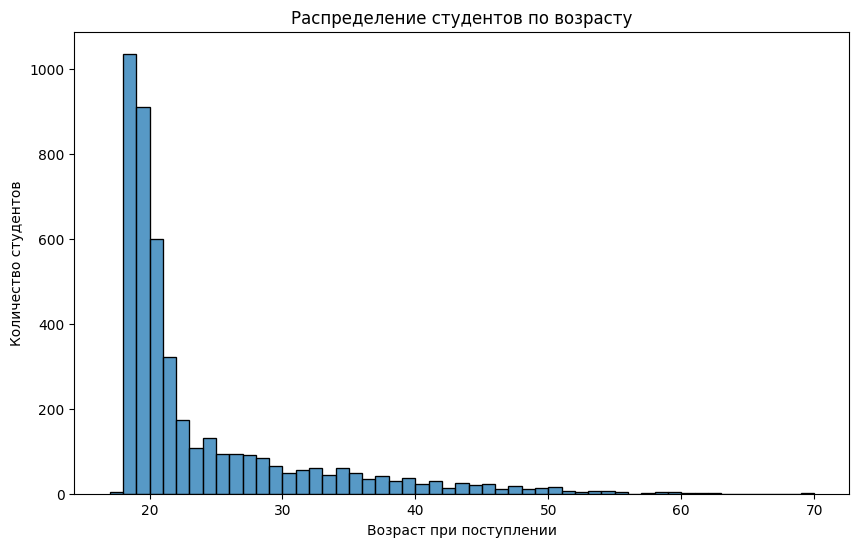

In [15]:
# Визуализация распределения по возрасту
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age at enrollment'], bins=range(int(dataset['Age at enrollment'].min()), int(dataset['Age at enrollment'].max()) + 1), kde=False)
plt.title('Распределение студентов по возрасту')
plt.xlabel('Возраст при поступлении')
plt.ylabel('Количество студентов')
plt.show()

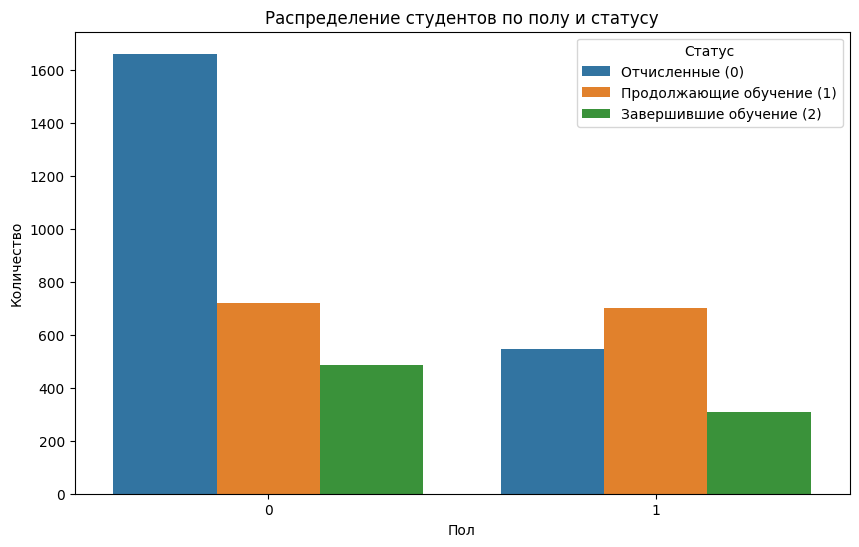

In [16]:
# Визуализация распределения по полу и статусу
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Target', data=dataset)
plt.title('Распределение студентов по полу и статусу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Статус', loc='upper right', labels=['Отчисленные (0)', 'Продолжающие обучение (1)', 'Завершившие обучение (2)'])
plt.show()


In [18]:
# Преобразование категориальных данных
df = dataset.copy()
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate' : 2})

Проверка преобразования

In [19]:
df['Target']

,Target
0,0
1,2
2,0
3,2
4,2
...,...
4419,2
4420,0
4421,0
4422,2


In [20]:
# Подготовка данных
X = df.drop(['Target'], axis=1)
y = df['Target']

In [23]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)

# Определение моделей
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=2000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

In [24]:
# Оценка моделей
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.745968 (0.016956)
LDA: 0.760377 (0.016962)
KNN: 0.591125 (0.019121)
CART: 0.679575 (0.023064)
NB: 0.684661 (0.021682)
SVC: 0.502121 (0.003423)


In [26]:
# Linear Discriminant Analysis (LDA) - Визуализация решений
lda = LinearDiscriminantAnalysis(solver='eigen')
lda.fit(X_train, y_train)
lda_pred_res = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_pred_res)

print(f'Точность LDA: {lda_accuracy}')
print(f'Предсказания LDA: {lda_pred_res}')

Точность LDA: 0.7672316384180791
Предсказания LDA: [2 2 2 2 2 2 0 0 0 2 2 2 0 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 0 2 1 2 2 2 2 1 0
 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 0 0 2 2 2 2 0 0 2 2 2 0 2 0 2
 2 2 2 2 2 1 2 0 2 2 0 2 0 2 1 1 2 1 1 2 2 2 2 2 0 1 2 1 2 0 2 2 0 1 0 0 0
 2 2 2 0 1 2 2 2 2 1 1 2 2 2 2 1 2 0 2 2 2 2 2 1 0 1 0 0 2 2 2 2 0 2 2 2 2
 2 2 0 1 1 2 2 0 2 2 2 1 2 2 1 1 2 2 2 2 2 1 0 1 0 1 2 0 2 2 2 1 2 2 1 2 2
 0 1 0 0 0 0 2 2 0 0 2 2 1 1 2 0 2 2 2 0 1 2 2 1 2 0 2 2 1 2 2 2 2 2 2 0 0
 2 0 2 0 2 1 2 2 2 2 0 0 2 1 2 0 2 2 2 2 2 2 2 2 1 2 0 0 0 0 2 0 2 2 2 2 2
 0 2 1 0 1 0 0 2 1 2 2 0 1 2 2 1 2 0 0 0 2 2 0 2 2 2 1 1 0 2 2 1 2 1 2 2 1
 0 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 1 0 0 2 2 2 0 0
 0 0 0 2 2 1 2 0 2 0 2 1 2 2 0 2 1 0 2 2 2 2 2 2 0 2 2 1 1 0 2 2 2 2 1 1 2
 2 2 2 0 0 2 2 2 2 0 2 2 2 2 0 2 0 1 2 0 2 2 1 0 2 0 2 1 2 2 2 2 2 0 2 2 2
 2 2 1 2 0 2 1 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 1 2 0 2 2 2 2 2 2 0 2 0
 2 1 2 0 0 0 2 0 2 0 2 2 2 2 2 2 2 0 2 0 0 2 0 2 

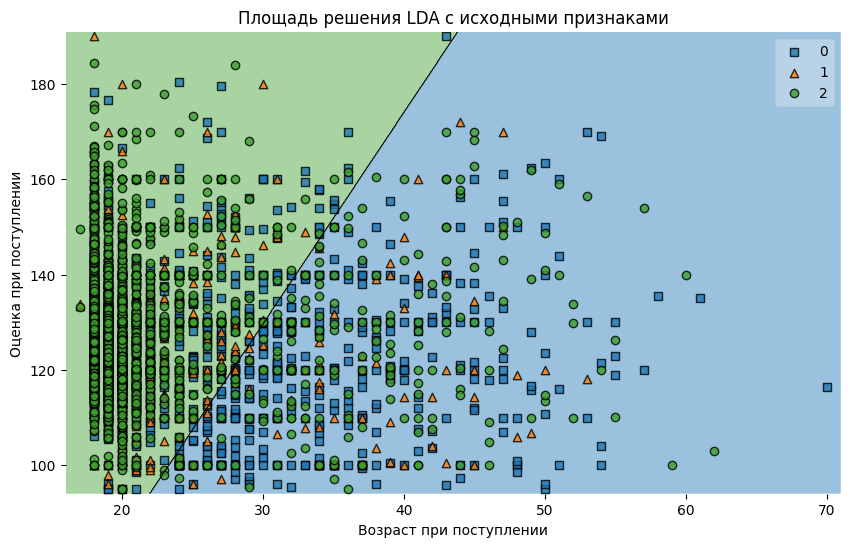

In [27]:
# Визуализация решений LDA на двумерном пространстве
plt.figure(figsize=(10, 6))
X_2d = X_train[['Age at enrollment', 'Admission grade']].values
y_2d = y_train.values
lda1 = LinearDiscriminantAnalysis(solver='eigen')
lda1.fit(X_2d, y_2d)

plt.title('Площадь решения LDA с исходными признаками')
plot_decision_regions(X=X_2d, y=y_2d, clf=lda1)
plt.xlabel('Возраст при поступлении')
plt.ylabel('Оценка при поступлении')
plt.show()

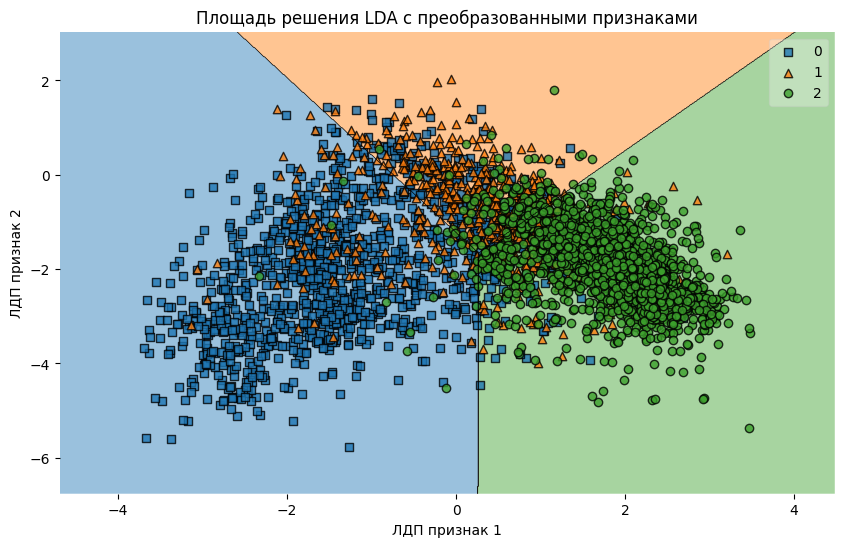

In [30]:
# Преобразование y в массив NumPy
y_lda = np.array(y)

# Построение графика
plt.figure(figsize=(10, 6))
plt.title('Площадь решения LDA с преобразованными признаками')
plot_decision_regions(X=X_lda, y=y_lda, clf=lda2)
plt.xlabel('ЛДП признак 1')
plt.ylabel('ЛДП признак 2')
plt.show()
